<a href="https://colab.research.google.com/github/aetknaapen/assignments/blob/master/Python_assignment_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Assignment Applied Economic Analysis 1

**Annemarie van Oijen (213579) & Anne Knaapen (255349)**


##Abstract

In this assignment, we examine whether the requirements of the climate accord of Paris will be reached in the European Union with regard to CO2 emissions. First, we discuss the research question and the corresponding motivation. Second, we outline the dataset, and look at the development of CO2 emission levels, both on worldwide and EU level. We find that, on EU level, CO2 emissions have already been decreasing in the last decades. Next, we make both a naive and an ARIMA prediction about the future development of the EU CO2 emission levels. With ARIMA, we find that the targets for CO2 emission levels will be reached. 

##Content



*   [Research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=r5UjBz4gJqi0)
*   [Motivation](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=6MliNdsULqPe)
* [Results](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=e97jtheoL-Fp)
* [Conclusion](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=GGlA_Tj6NXdx)
* [Discussion](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=4Op9jggvNbrN)





##Research question

The research question is: Will the requirements of the climate accord of Paris be reached in the European Union with regard to CO2 emission?

##Motivation

The last decades, the interest in and evidence of climate change has grown rapidly. All over the world, countries are taking action to reach a more green society with less polution. The Paris Agreement that was signed in 2015 was a big step towards a worldwide decrease of polution, a lower level of emissions, especially focussed towards CO2. Within this agreement of the  [United Nations](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement), countries set their own goals for reducing emissions. The [European Union's nationally determined contribution](https://ec.europa.eu/clima/policies/international/negotiations/paris_en) was to reduce greenhouse gas emissions by at least 40 percent in 2030, compared to 1990. As shown by the data, the CO2 emissions in the European Union are already decreasing. However, a 40 percent decrease compared to 1990 is not yet reached. In this paper we will research whether and if this will be reached by forecasting the CO2 emission based on past data.


##Results

**Answer**
The answer to the [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=r5UjBz4gJqi0) is: Yes, the requirements of the climate accord will be reached in 2030 when looking at the EU level.

**Prepare data**

First, we have to import the [Worldbank dataset](https://data.worldbank.org/) and search a  right indicator for the level of CO2 emission.

In [1]:
!pip install wbdata

  Running setup.py bdist_wheel for wbdata ... - done
  Stored in directory: /root/.cache/pip/wheels/57/61/6a/3978e90cf2f9443b94ce56b4fa839850da9076e697be3a27e3
Successfully built wbdata


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata as wb


In [3]:
wb.search_indicators("CO2 emission")

EN.ATM.CO2E.PC      	CO2 emissions (metric tons per capita)
EN.ATM.CO2E.LF.ZS   	CO2 emissions from liquid fuel consumption (% of total) 
EN.ATM.CO2E.LF.KT   	CO2 emissions from liquid fuel consumption (kt) 
EN.ATM.CO2E.KT      	CO2 emissions (kt)
EN.ATM.CO2E.KD.GD   	CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.GL.KT   	CO2 emissions from gas flaring (thousand metric tons)
EN.ATM.CO2E.GF.ZS   	CO2 emissions from gaseous fuel consumption (% of total) 
EN.ATM.CO2E.GF.KT   	CO2 emissions from gaseous fuel consumption (kt) 
EN.ATM.CO2E.FF.ZS   	CO2 emissions from fossil-fuels (% of total)
EN.ATM.CO2E.FF.KT   	CO2 emissions from fossil-fuels, total (thousand metric tons)
EN.ATM.CO2E.CP.KT   	CO2 emissions from cement production (thousand metric tons)
EN.CO2.TRAN.ZS      	CO2 emissions from transport (% of total fuel combustion)
EN.CO2.OTHX.ZS      	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
EN.CO2.

Above, all the possible indicators for CO2 emission are stated. We choose the variabele for CO2 emission in kilo ton because the climate accord requirements are stated in this way.

**Descriptive statistics**

We now take a look at what the dataset looks like. We rename the indicator EN.ATM.CO2E.KT  into CO2 emission. Next, the first 10 and last 10 rows of the dataset are shown, to get an idea what the data looks like. 

In [4]:
indicators = {"EN.ATM.CO2E.KT ": "CO2_emission"}
df_wb = wb.get_dataframe(indicators, convert_date=True)
df_wb.reset_index(inplace = True)
df_wb.head(10)

,country,date,CO2_emission
0,Arab World,2017-01-01,NaN
1,Arab World,2016-01-01,NaN
2,Arab World,2015-01-01,NaN
3,Arab World,2014-01-01,1.895700e+06
4,Arab World,2013-01-01,1.775096e+06
5,Arab World,2012-01-01,1.796962e+06
6,Arab World,2011-01-01,1.655808e+06
7,Arab World,2010-01-01,1.645559e+06
8,Arab World,2009-01-01,1.581328e+06
9,Arab World,2008-01-01,1.491970e+06


In [5]:
df_wb.tail(10)

,country,date,CO2_emission
15302,Zimbabwe,1969-01-01,6750.947
15303,Zimbabwe,1968-01-01,6384.247
15304,Zimbabwe,1967-01-01,5298.815
15305,Zimbabwe,1966-01-01,6046.883
15306,Zimbabwe,1965-01-01,5214.474
15307,Zimbabwe,1964-01-01,4473.740
15308,Zimbabwe,1963-01-01,NaN
15309,Zimbabwe,1962-01-01,NaN
15310,Zimbabwe,1961-01-01,NaN
15311,Zimbabwe,1960-01-01,NaN


By looking at this overview, we can see that the dataset exists of data of all countries in the period 1960-2017. However, the dataset also includes empty cells (NaN).

**CO2 emission over time**

To see if and how CO2 emissions vary over time, we compare the dataset of 1990 with the one of 2014. This data is choosen because by looking more closely into the [dataset](https://databank.worldbank.org/data/reports.aspx?source=2&series=EN.ATM.CO2E.KT&country=) of the Worldbank, for this period many data is available. We merge the datasets based on 'inner', which means only countries with data for both periods are included in the new, merged dataset. We start by looking at the complete dataset, so all countries and country groups as stated by the Worldbank.

In [0]:
df_1990=df_wb[df_wb['date']=='1990-01-01']
df_2014=df_wb[df_wb['date']=='2014-01-01']

In [0]:
df_merged = pd.merge(df_1990, df_2014, on=['country'], suffixes=['_1990', '_2014'], how='inner')

We again take a look at the first 10 rows to see what the dataset looks like.

In [8]:
df_merged.head(10)

,country,date_1990,CO2_emission_1990,date_2014,CO2_emission_2014
0,Arab World,1990-01-01,6.717361e+05,2014-01-01,1.895700e+06
1,Caribbean small states,1990-01-01,3.159487e+04,2014-01-01,6.363712e+04
2,Central Europe and the Baltics,1990-01-01,9.983024e+05,2014-01-01,6.363858e+05
3,Early-demographic dividend,1990-01-01,2.851175e+06,2014-01-01,7.079255e+06
4,East Asia & Pacific,1990-01-01,4.703785e+06,2014-01-01,1.427211e+07
5,East Asia & Pacific (excluding high income),1990-01-01,2.864275e+06,2014-01-01,1.168863e+07
6,East Asia & Pacific (IDA & IBRD countries),1990-01-01,2.822276e+06,2014-01-01,1.164808e+07
7,Euro area,1990-01-01,NaN,2014-01-01,2.191542e+06
8,Europe & Central Asia,1990-01-01,NaN,2014-01-01,6.245992e+06
9,Europe & Central Asia (excluding high income),1990-01-01,NaN,2014-01-01,3.029861e+06


We describe the total dataset of both 1990 and 2014, to compare the averages of CO2 emission of these years. 

In [9]:
df_merged.describe()

,CO2_emission_1990,CO2_emission_2014
count,2.150000e+02,2.510000e+02
mean,7.294724e+05,1.273323e+06
std,2.475727e+06,4.224233e+06
min,7.334000e+00,1.100100e+01
25%,8.599115e+02,2.458724e+03
50%,1.000358e+04,2.223302e+04
75%,1.477123e+05,2.455680e+05
max,2.214940e+07,3.613828e+07


If we compare the mean of the CO2 emission of 1990 and 2014, we see that in 2014, the average level of CO2 emissions is higher. Next, we show this graphically.

Text(0, 0.5, 'CO2 emission in 2014')

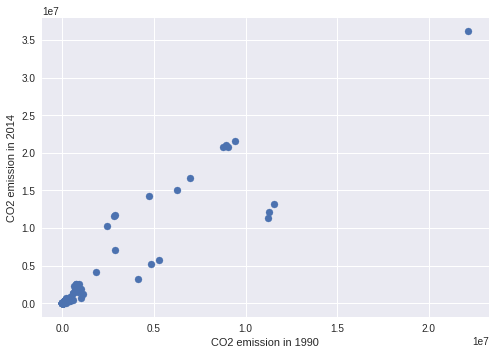

In [10]:
plt.scatter(df_merged['CO2_emission_1990'],df_merged['CO2_emission_2014'])
plt.xlabel('CO2 emission in 1990')
plt.ylabel('CO2 emission in 2014')

Next, we make this graph interactive, to show which point belongs to which country. It is important to remember that becaused we merged the dataset based on 'inner', only countries that have data in both periods are included. 

In [11]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

hover = HoverTool(tooltips=[
     ('country','@country'),
     ])

plot = figure(tools=[hover])
plot.circle('CO2_emission_1990','CO2_emission_2014',
    size=10, source=df_merged)
output_file('inequality.html')
show(plot)

Loading BokehJS ...

We showed that for the dataset as a whole, CO2 emission rises over time. The quantities have to be interpreted with care, for example in the upper right corner, there is a dot whith enormous CO2 emission. However, this is the CO2 emission level for the world as total. This has to do with the way the dataset of the Worldbank is build, it consists of both countries and groups of countries. Furthermore, the data creates income classes, namely low income, lower middle income, upper middle income and high income.

To be able to make a prediction with regard to the climate accord, and to solve for the earlier mentioned difficulties with the dataset, we now isolate the variable for the European Union. To meet our [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=O6MUvjIMJqGR), we must check whether the emission level of 2030 will be 40 percent lower as compared to 1990. 
First, we start with selecting the data for the European Union and display the first and last 10 rows. 

In [0]:
indicators={"EN.ATM.CO2E.KT":"CO2_emission"}
countries=["EUU"]
df_wb_1=wb.get_dataframe(indicators, country=countries, convert_date=True)

In [13]:
df_wb_1.head(10)

,CO2_emission
date,
2017-01-01,NaN
2016-01-01,NaN
2015-01-01,NaN
2014-01-01,3241844.353
2013-01-01,3421472.348
2012-01-01,3494155.955
2011-01-01,3568090.009
2010-01-01,3709775.555
2009-01-01,3601566.052


In [14]:
df_wb_1.tail(10)

,CO2_emission
date,
1969-01-01,3.520601e+06
1968-01-01,3.317199e+06
1967-01-01,3.135495e+06
1966-01-01,3.066068e+06
1965-01-01,2.977006e+06
1964-01-01,2.879590e+06
1963-01-01,2.763661e+06
1962-01-01,2.587256e+06
1961-01-01,2.445946e+06


Text(0.5, 0, 'year')

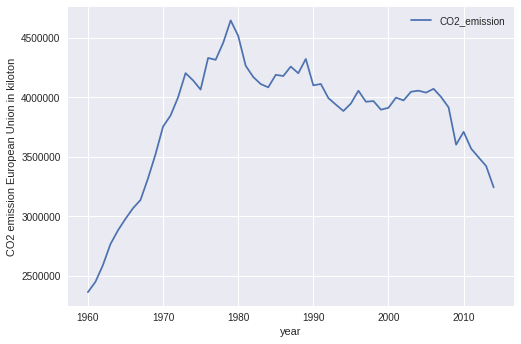

In [15]:
df_wb_1.plot()
plt.ylabel('CO2 emission European Union in kiloton')
plt.xlabel('year')

By looking at this graph, in contrast to the worldwide data, the CO2 emission level at the EU level is already falling. Now we are going to predict whether the target will be reached. The decrease in CO2 emissions in the EU over the last decades can be explained by the fact that the Europe is a relatively high developed continent, compared to other continents like Africa or Asia. As a high developed continent, Europe has a large service sector and a small industrial sector. In contrast, developing continents like Asia still have a large industrial sector, which might explain why CO2 emission levels are higher. 

**Prediction**

We are going the predict the EU wide level of CO2 emission. We start we a naive prediction inspired by an [example](https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/) about predicting the level of sales of champagne.

In [0]:
import scipy as sc
import sklearn as sk
import statsmodels as st

The dataset needs to be adapted, it consists of empty cells for the period 2015-2017. This is solved by dropping the first three rows of the dataset.

In [0]:
df_wb_1.drop(df_wb_1.index[:3], inplace=True)

In [18]:
df_wb_1.head(10)

,CO2_emission
date,
2014-01-01,3241844.353
2013-01-01,3421472.348
2012-01-01,3494155.955
2011-01-01,3568090.009
2010-01-01,3709775.555
2009-01-01,3601566.052
2008-01-01,3915303.571
2007-01-01,4003410.580
2006-01-01,4071767.127


*Naive prediction*

Next, we start with preparing the dataset for the naive forecast. The naive forecast is a baseline prediction with which more elaborate predictions are compared with. This naive way of predicting uses the data of the previous period for the prediction for the next period, and predicts the average outcome to get a naive of baseline forecast.


Next, we run the naive model, with both a train and a test set, who both consists of half of the data. This code displays both the predicted value by the model and the expected value, so the real values in the test dataset. We also calculate the RMSE (root-mean-square deviation), to see how well the model fits.

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
	
	yhat = history[-1]
	predictions.append(yhat)
	
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=4202996.500, Expected=4258990
>Predicted=4258990.000, Expected=4179574
>Predicted=4179574.000, Expected=4189512
>Predicted=4189511.500, Expected=4084429
>Predicted=4084428.750, Expected=4111986
>Predicted=4111986.250, Expected=4171917
>Predicted=4171917.000, Expected=4266013
>Predicted=4266013.000, Expected=4518359
>Predicted=4518359.000, Expected=4647644
>Predicted=4647644.000, Expected=4457561
>Predicted=4457561.000, Expected=4315908
>Predicted=4315908.000, Expected=4331570
>Predicted=4331569.500, Expected=4065318
>Predicted=4065317.500, Expected=4142868
>Predicted=4142868.500, Expected=4203896
>Predicted=4203895.500, Expected=3999496
>Predicted=3999496.000, Expected=3846742
>Predicted=3846742.000, Expected=3753441
>Predicted=3753440.750, Expected=3520601
>Predicted=3520600.750, Expected=3317199
>Predicted=3317198.750, Expected=3135495
>Predicted=3135494.750, Expected=3066068
>Predicted=3066068.250, Expected=2977006
>Predicted=2977005.750, Expected=2879590
>Predicted=28795

The RMSE is about 139885. This means for each prediction, the model is 139885 kiloton CO2 emission wrong. 

*Optimal ARIMA model*

Next, we use the [ARIMA model](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3). The ARIMA (AutoRegressive Integrated Moving Average) model is one of the most used model in time series forecasting. These models look like (p,d,q), where the integers p, d and  q stand for the seasonality, trend and noise in datasets.



Aannames geen trend en geen seasonality. Twijfel of er toch trend is. Zometeen passen we model hier op aan -> verwijzing naar deze cel: https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=3jh-OBbKDYp1

We start with preparing the data for the model. The data is divided in both a dataset and a validation set. The validation set is used for checking how well the model performs, after building it with making use of the dataset. We choose to use the period 1960-1999 for the dataset, and 2000-2014 for the validation set. 

In [20]:
split_point = len(df_wb_1) - 15
dataset, validation = df_wb_1[0:split_point], df_wb_1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 40, Validation 15


The division went well, 40 observations are included in the dataset, and 15 in the validation set which makes 55 observations in total.

Making use of the following [example](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/), we are going to search for the optimal ARIMA parameters for our model. The code evaluates ARIMA models with different parameters and looks for the optimal combination of parameters by making use of our observations. The values of the parameters have to be in a certain range. P has to be between 0 and 5, d between 0 and 3, and q between 0 and 5. 

In [22]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_arima_model(X, arima_order):
	
	X = df_wb_1.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(df_wb_1.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Unfortunately, we do not find an optimal model is this way, so we figure it out manually. First, for ARIMA, stationary data is assumed. However, in general time series data is often non-stationary. Now, we make a stationary version of our data by differencing after which we test whether it is indeed stationary with the augmented Dickey-Fuller test. If this dataset turns out to be stationary, it is likely that our original dataset is not stationary (df_wb_1), and we will choose a d parameter in our model of 1 to correct for this. Furthermore, because our data does show a trend, but no seasonality, we decide to use the model (1,1,0).

In [23]:
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return df_wb_1(diff)
 

X = df_wb_1.values
X = X.astype('float32')

stationary = difference(X)
stationary.index = df_wb_1.index[1:]

result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


TypeError: ignored

For the other parameters of the ARIMA model, we use two graphs, one for autocorrelation and one for partial autocorrelation. 

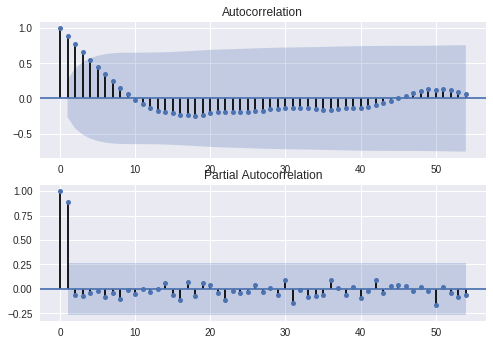

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(df_wb_1, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df_wb_1, ax=pyplot.gca())
pyplot.show()

If we compare these graphs to [this example](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/), we assume that we need to correct for autocorrelation. The resulting ARIMA model will indeed have the parameters (1,1,0).

In [25]:
from pandas import DataFrame
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

                   0
count      28.000000
mean   -65835.767857
std    125688.829396
min   -266252.000000
25%   -158666.812500
50%    -91181.875000
75%     34666.500000
max    252346.000000


Mean: -65835.8 -> bias

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

X = df_wb_1.values
X = X.astype('float32')

model = ARIMA(X, order=(1,1,0))
model_fit = model.fit(trend='nc', disp=0)

bias = -65835.8

model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

x is variabele -> EU level emission. Verander je naar x.astype -> waarom? Model vul je weer in welke Arima parameters je hebt gebruikt. Model waar dan gefit. Bias komt van mean -> uitleggen waarom dat de bias is. Model sla je op als model_fit. def get new args is om een fout er uit te halen anders werkt het niet. 

Je kan nu 1 periode voorspellen en laaden bestaande model

In [27]:
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)


Predicted: 2268843.738


je laadt dus bestaande model weer en je laat de bias. dan de voorspelling is yhat wat dus bias plus de voorspelling op basis van model is. Maar float want....

Nu met validation set erbij hoe goed model is


>Predicted=2268843.738, Expected=4142868
>Predicted=4010323.339, Expected=4203896
>Predicted=4153643.525, Expected=3999496
>Predicted=3945066.429, Expected=3846742
>Predicted=3744963.632, Expected=3753441
>Predicted=3657489.427, Expected=3520601
>Predicted=3414792.246, Expected=3317199
>Predicted=3169601.791, Expected=3135495
>Predicted=2987299.010, Expected=3066068
>Predicted=2942726.875, Expected=2977006
>Predicted=2878350.288, Expected=2879590
>Predicted=2773383.187, Expected=2763661
>Predicted=2650469.728, Expected=2587256
>Predicted=2453997.252, Expected=2445946
>Predicted=2299058.155, Expected=2359595
RMSE: 491770.102


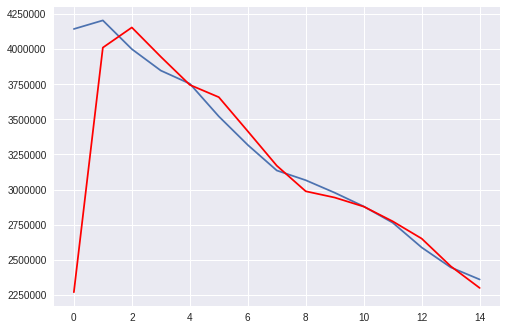

In [28]:
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# load and prepare datasets
dataset = df_wb_1.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]
validation = df_wb_1.from_csv('validation.csv')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

The lines of the graph follow the same trend so the fit of our model looks quite nice. However, a remark must be made. The RMSE of about 491770 is higher compared to the naive forecast. 

*Out of sample forecast*

Now we have found our model, we are going to predict the CO2 emission level of 2030. The following [example](https://machinelearningmastery.com/make-sample-forecasts-arima-python/) is used as an inspiration for this. The model start with calculating a difference. This because differencing is necessary to create a stationary model, which is one of the assumptions of the ARIMA model. Next, we have to forecast 16 steps because we have to forecast from our last observation, 2014, until 2030. 


In [29]:
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 

# seasonal difference
X = df_wb_1.values
year=1
differenced = difference(X, year)
# fit model
model = ARIMA(differenced, order=(1,1,0))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=16)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
year = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, year)
	print('Year %d: %f' % (year, inverted))
	history.append(inverted)
	year += 1
  



Year 1: 2235716.213601
Year 2: 2248318.664453
Year 3: 2233749.278624
Year 4: 2233907.673091
Year 5: 2226083.261133
Year 6: 2222585.719697
Year 7: 2216742.911757
Year 8: 2212171.293917
Year 9: 2206910.660877
Year 10: 2202023.490426
Year 11: 2196933.894389
Year 12: 2191954.017824
Year 13: 2186914.670702
Year 14: 2181907.558032
Year 15: 2176882.973524
Year 16: 2171867.859168


According to the predictions of our model, the level of CO2 emission in 2030 will be about 2171868 kiloton. 

In [30]:
df_wb_1['1990-01-01'].describe

<bound method NDFrame.describe of             CO2_emission
date                    
1990-01-01  4.100787e+06>

The level of CO2 emission in 1990 is about 4100787. In order to reach the climate accord, the level of 2030 has to be 40 percent lower, so the target level is approsimately 2460472. This would imply that the goal set in the Paris agreement would be reached in 2030. 


##Conclusion

Using the ARIMA model, we find that the Paris agreement requirements regarding the reduction of CO2 emissions in the EU will be reached in 2030. 

##Discussion

To be able to better estimate the future emissions of CO2, it would be easier to have more data (for example on a monthly basis instead of a yearly basis). Monthly data would have to be adjusted for seasonality, as it would be logical to have higher CO2 emissions in winter than in the summer. Other [examples](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3) also show that monthly data on CO2 emissions show seasonality. 


Meer data zou beter zijn, bijvoorbeeld maandelijkse data, zeker als je kijkt naar de grafiek met de normale distributie en dergelijke. In deze sectie nog wat daarover uitleggen, je wil meer zoals in deze link staat https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3. Mogelijk dat maandelijkse data beter is, wordt in dat voorbeeld ook gedaan. Verwijzen naar voorbeeld met link. 

Aannames geen trend en geen seasonality -> twijfel om trend te zien als je naar EU grafiek kijkt, seasonality blijkt hier niet uit. Daarom dataset veranderen in log om dit op te lossen. Maar dan werd predicted values negatief dus misschien met meer data beter op te lossen/trend wel of niet te zien. Maar in andere onderzoeken voegen ze dan later trend toe en daar is hier geen sprake van. Voorbeeld bij geven!

Hebben nu geen optimaal model, wordt niet aangegeven door zoeken naar optimal model. Dus kiezen eigen model maar is op basis van aannames dus meerdere mogelijkheden!